In [3]:
import pde
import numpy as np
import time
#required conda install -c conda-forge mpi4py      
#required conda install -c conda-forge py-pde

from pde import DiffusionPDE, ScalarField, UnitGrid, CartesianGrid

def test(y,z):
    return z[1]*np.sin(z[0]*y)
def test2(value, dx, x, y, t):
    z=[1,2,3]
    #z=test(y,z)
    i=0
    z=np.empty(64)
    for a in y:
        if a<16: z[i]=np.sin(a)
        elif a<32:  z[i]=0
        elif a<48:  z[i]=np.cos(a)
        else: z[i]=0
        i+=1
    #z=z*np.heaviside(y-28,1)
    #z=z*np.heaviside(-1*(y-32),1)
    return z
y=np.linspace(0,63,64);
zz=np.empty(64)
i=0
for a in y:
    if a<16: zz[i]=np.sin(a)
    elif a<32:  zz[i]=0
    elif a<48:  zz[i]=np.cos(a)
    else: zz[i]=0
    i+=1
print(zz)
print(np.max(zz))

[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849 -0.54402111 -0.99999021
 -0.53657292  0.42016704  0.99060736  0.65028784  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.83422336 -0.01327675 -0.84857027 -0.90369221
 -0.12796369  0.76541405  0.95507364  0.26664293 -0.66693806 -0.98733928
 -0.39998531  0.5551133   0.99984331  0.52532199 -0.43217794 -0.99233547
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
0.9998433086476912


In [16]:
class controller:
    def __init__(self, grid, state):
        self.grid=grid
        self.state=state
        self.control=[]

In [12]:
#grid = UnitGrid([64, 64], periodic=[False, True]) # generate grid

state = ScalarField.random_uniform(grid, 0.2, 0.3) # generate initial condition

trial=controller(grid,state)
trial.control=test2

TypeError: controller.__init__() missing 1 required positional argument: 'num_sens'

  0%|          | 0/1.0 [00:02<?, ?it/s]

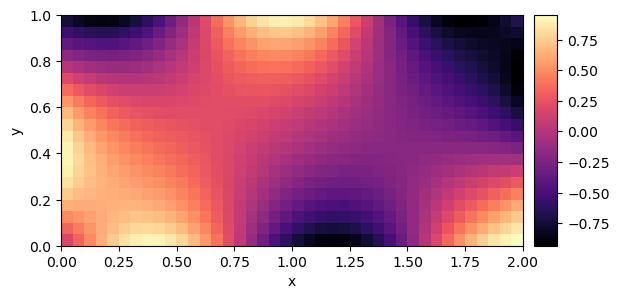

In [18]:
from pde import CartesianGrid, DiffusionPDE, ScalarField, solve_laplace_equation

def bc_value(adjacent_value, dx, x, y, t):
    return 4*np.sin(4.*y)

grid = pde.CartesianGrid([[0, 2], [0, 1]], [40, 20], periodic=[False, False]) # generate grid
state = ScalarField.random_uniform(grid, 0.0, 0.2) # generate initial condition

bc_x_left = {"derivative": 0.}
#bc_x_right = {"value_expression": trial.control}
bc_x_right = {"value_expression": bc_value}
bc_x = [bc_x_left, bc_x_right]
bc_y=[{"derivative": 0.},{"derivative": 0.}]
bc=[{"value":"sin(4*y+4*x)"}, {"value":"sin(4*y+4*x)"}]

eq = DiffusionPDE(100, bc=bc)  # define the pde
result = eq.solve(state, t_range=1, adaptive=True)
#grid = pde.CartesianGrid([[0, 2], [0, 1]], [40, 20], periodic=[False, False])
#result=solve_laplace_equation(grid, bc)
result.plot(cmap="magma")

In [25]:
print(dir(grid))
print(grid.axes)
print((grid.axes_bounds[0][0].item()))
print((grid.axes_bounds[0][1].item()))
print((grid.axes_bounds[1][0].item()))
print((grid.axes_bounds[1][1].item()))
print(grid.axes_coords[1])
print(grid.shape)

['__abstractmethods__', '__annotations__', '__class__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_axes_bounds', '_axes_coords', '_axes_described', '_axes_symmetric', '_boundary_coordinates', '_cache_hash', '_cache_methods', '_coords_full', '_coords_symmetric', '_difference_vector', '_discretization', '_get_boundary_index', '_get_operator_info', '_idx_valid', '_iter_boundaries', '_logger', '_make_get_valid', '_make_interpolation_axis_data', '_make_interpolator_compiled', '_make_set_valid', '_mesh', '_operators', '_periodic', '_shape', '_shape_full', '_subclasses', '_vector_to_cartesian', 'assert_grid_compatible', 'axes', 'axes_bo

  0%|          | 0/10.0 [00:00<?, ?it/s]

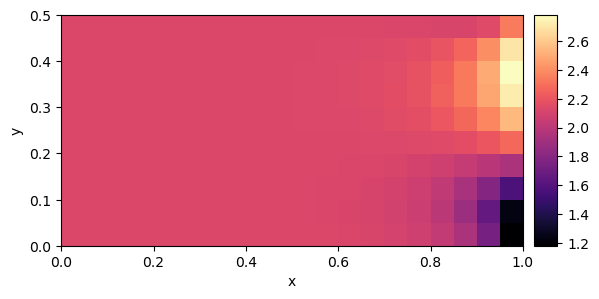

In [89]:
from pde import CartesianGrid, DiffusionPDE, ScalarField

def bc_value(adjacent_value, dx, x, y, t):
    return 3*np.sin(4.*y)

grid = pde.CartesianGrid([[0, 1], [0, 0.5]], [20, 10], periodic=[False, True]) # generate grid
state = ScalarField.random_uniform(grid, 0.0, 0.2) # generate initial condition

bc_x_left = {"derivative": 0}
#bc_x_right = {"value_expression": trial.control}
bc_x_right = {"value_expression": bc_value}
bc_x = [bc_x_left, bc_x_right]
bc_y="periodic"

eq = DiffusionPDE(100, bc=[bc_x, bc_y])  # define the pde
result = eq.solve(state, t_range=10, adaptive=True)
result.plot(cmap="magma")

In [ ]:
import pde
import numpy as np
import gc
import tracemalloc 
#required conda install -c conda-forge mpi4py      
#required conda install -c conda-forge py-pde

from pde import DiffusionPDE, ScalarField, UnitGrid, CartesianGrid
grid = UnitGrid([64, 64], periodic=[False, True]) # generate grid
#grid = CartesianGrid([[0, 2 * np.pi]] * 2, 64)
state = ScalarField.random_uniform(grid, 0.2, 0.3) # generate initial condition
#grid=trial.grid

# set boundary conditions `bc` for all axes
bc_x_left = {"derivative": 0.1}
#bc_x_right = {"value_expression": trial.control}
bc_x_right = {"value": 0}
bc_x = [bc_x_left, bc_x_right]

bc_y = "periodic"
bcs = [{"value": "sin(y)"}, {"value": "sin(x)"}]
eq = DiffusionPDE(bc=[bc_x, bc_y])
tracemalloc.start() 

for i in range(90):
    gc.collect()
    time1=time.time()
    result=state
    
    for j in range(50):
        result = eq.solve(result, t_range=0.2, tracker=None, adaptive=True)
    # if i % 20== 0:
    #     snapshot=tracemalloc.take_snapshot()
    #     for stat in snapshot.statistics("lineno"):
    #         print(stat)
    print(i, time.time()-time1)


In [9]:
grid=None
eq=None
result=None
state=None
gc.collect()

8411

In [18]:
import io
from contextlib import redirect_stdout
dt=0.2
trap = io.StringIO()
result = eq.solve(trial.state, t_range=dt, tracker=None, adaptive=True)
result = eq.solve(result, t_range=dt,  tracker=None,adaptive=True)
result = eq.solve(result, t_range=dt, tracker=None,adaptive=True)
result = eq.solve(result, t_range=dt,  tracker=None,adaptive=True)

result.plot()

NameError: name 'trial' is not defined

In [322]:
print(type(state.data), result.data.shape)
print(result.data[0,0], result.data[63,0], result.data[0,63], result.data[63,63])
print(state.data[0,0], state.data[63,0], state.data[0,63])

<class 'numpy.ndarray'> (64, 64)
0.4624700152279102 0.03220655336270971 0.4621691604322135 0.03208888084104183
0.2742285721504054 0.21462711048280567 0.2562883433258105


In [357]:
def sensor_meas(sensors,domain):
    #assume senors form a square grid, so take square root of number of sensors
    #assume sensors read from middle of domain
    n_sense=int(np.sqrt(sensors))
    meas=np.empty((n_sense,n_sense))
    dimx=domain.shape[0]
    dimy=domain.shape[1]
    startx=round((dimx-n_sense)/2)
    starty=round((dimy-n_sense)/2)
    for i in range(n_sense):
        for j in range(n_sense):
            meas[i,j]=domain[i+startx,j+starty]
    return meas

In [6]:
a=np.array([1,2])
b=np.array([3,4])
c=np.array([5,6])
d=np.array([a,b,c])
print(np.unwrap(d))
print(a.shape)

[[1. 2.]
 [3. 4.]
 [5. 6.]]
(2,)


In [15]:
a=np.array([1,2])
a=np.vstack([a, [1,2]])
a=np.vstack([a, [3,4]])
#a[2:4]=20
#print(a)
#print(a[:,1])
for j in a:
    for i in j:
        print(i.item(), type(i.item()))

1 <class 'int'>
2 <class 'int'>
1 <class 'int'>
2 <class 'int'>
3 <class 'int'>
4 <class 'int'>


In [11]:
import math
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
b=np.array([[3,4,5],[0,1,2]])
print(a.flatten())
print(a/10)
aa=np.array([99,98,97])
a[0,:]=aa
print(a)

[1 2 3 4 5 6 7 8 9]
[[0.1 0.2 0.3]
 [0.4 0.5 0.6]
 [0.7 0.8 0.9]]
[[99 98 97]
 [ 4  5  6]
 [ 7  8  9]]


In [29]:
aa=0.5*np.array(range(6))
for ab in aa:
    print(type(ab))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [1]:
#to make gymanasium work with py-pde, need to pass in action step:
#1.  control function to calculate control with all values constant except x,y
#2.  grid
#controller servers to pass these values to gymnasium.
#control will be nxm vector, where n is num_controls and m is number of cells per boundary
#if non-square boundary, m will be larger side and in gymnasium will need to hard code truncation of extra cells

class controller:
    def __init__(self, grid, state, num_sens):
        self.grid=grid
        self.num_sens=num_sens
        self.state=state
        self.control=[]

#need function to reduce full space to just sensors 
def sensor_meas(sensors,domain):
    #assume senors form a square grid, so take square root of number of sensors
    #assume sensors read from middle of domain
    n_sense=int(np.sqrt(sensors))
    meas=np.empty((n_sense,n_sense))
    dimx=domain.shape[0]
    dimy=domain.shape[1]
    startx=round((dimx-n_sense)/2)
    starty=round((dimy-n_sense)/2)
    for i in range(n_sense):
        for j in range(n_sense):
            meas[i,j]=float(domain[i+startx,j+starty])
    return meas.flatten()

C:\Users\Robert\anaconda3\Lib\site-packages\gymnasium\utils\passive_env_checker.py:192: UserWarning: WARN: The result returned by `env.reset()` should be `(obs, info)` by default, , where `obs` is a observation and `info` is a dictionary containing additional information.
  logger.warn(


[0.34614831 0.15252601 0.03738586 0.11852327 0.13153218 0.45446318
 0.05055848 0.36226597 0.24188289 0.02252269 0.42704646 0.21367884
 0.10152803 0.12664413 0.19659309 0.05700284] 16 ['math.sin', 's16']


C:\Users\Robert\anaconda3\Lib\site-packages\gymnasium\utils\passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


4.460944277474263 0.49307868575392305 0
8.921888072461085 0.49307868575392305 1
13.382832336244327 0.49307868575392305 2
17.843776610225078 0.49307868575392305 3
22.304716072160367 0.49307868575392305 4
26.76565578320812 0.49307868575392305 5
31.22659743470673 0.49307868575392305 6
35.687537057986574 0.49307868575392305 7
40.148481341287415 0.49307868575392305 8
44.60942536258353 0.49307868575392305 9
49.07036706456981 0.49307868575392305 10
53.531309221356004 0.49307868575392305 11
57.992253377266756 0.49307868575392305 12
62.4531968000478 0.49307868575392305 13
66.91413734957794 0.49307868575392305 14
71.3750816333268 0.49307868575392305 15
75.83601858203795 0.49307868575392305 16
80.29696287077222 0.49307868575392305 17
84.75790689581179 0.49307868575392305 18
89.2188511194702 0.49307868575392305 19
93.67979540523544 0.49307868575392305 20
98.14073969454812 0.49307868575392305 21
102.60167661285722 0.49307868575392305 22
107.06261706179035 0.49307868575392305 23
111.52354199714206 0

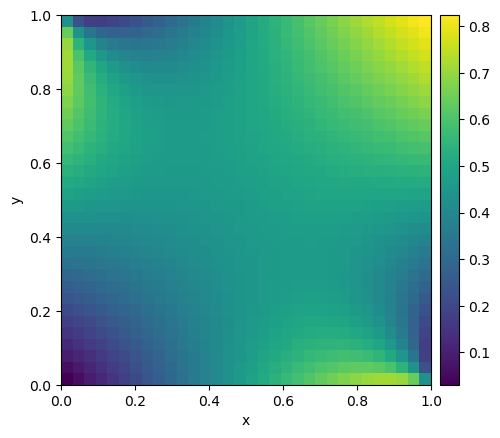

In [3]:
#import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import gymnasium
import copy
import pde
import MLC.MLC as gp

env = gymnasium.make("Diffusion-v0")
observation, grid, state = env.reset(seed=24)
Num_sens=4*4 #size of observation/sensor space in number of grid points
grid_dim=2 #x,y for including cotnrol location in alogrithim
Ns=grid_dim+Num_sens #sensors are first in s array, then 

s=sensor_meas(Num_sens,state.data)

left_bound=grid.axes_coords[1]
left_bound=np.vstack((left_bound, np.full(len(left_bound), grid.axes_bounds[0][0].item())))
right_bound=grid.axes_coords[1]
right_bound=np.vstack((right_bound, np.full(len(right_bound), grid.axes_bounds[0][1].item())))
bottom_bound=grid.axes_coords[0]
bottom_bound=np.vstack((bottom_bound, np.full(len(bottom_bound), grid.axes_bounds[1][0].item())))
top_bound=grid.axes_coords[0]
top_bound=np.vstack((top_bound, np.full(len(top_bound), grid.axes_bounds[1][1].item())))

#initialize arrays to hold control inputs along each boundary
left_control=np.zeros(grid.shape[1])
right_control=np.zeros(grid.shape[1])
bottom_control=np.zeros(grid.shape[0])
top_control=np.zeros(grid.shape[0])

implement=controller(grid, state, Num_sens)

bestTree=['math.sin', 's16']
control_name=bestTree
print(s, len(s), control_name)

#s=np.array([-0.1,-0.1])
#x=s[0]
#y=s[1]

#plt.figure(1)
#plt.scatter(x,y)#,'ro')
subtotal=0
for i in range(100):
    for j in range(Num_sens):
        obs_name='s'+str(j)
        control_name=[s[j].item() if c==obs_name else c for c in control_name]
        
    #assign values to boundary controls.  
    #this implementation ASSUMES square grid.  
    #if rectangular need to break into iterating over left/right and top/bottom
    for j in range(grid.shape[0]):
        #left bound
        holder_left=copy.copy(control_name)
        holder_right=copy.copy(control_name)
        holder_top=copy.copy(control_name)
        holder_bottom=copy.copy(control_name)
        for l in range(Num_sens, Ns):
            obs_name='s'+str(l)
            holder_left=[left_bound[l-Num_sens,j].item() if c==obs_name else c for c in holder_left]
            holder_right=[right_bound[l-Num_sens,j].item() if c==obs_name else c for c in holder_right]
            holder_bottom=[bottom_bound[l-Num_sens,j].item() if c==obs_name else c for c in holder_bottom]
            holder_top=[top_bound[l-Num_sens,j].item() if c==obs_name else c for c in holder_top]
        #print(holder_left)
        k,dummy=gp.evaluate(holder_left)
        if k>10:  k=10.0
        elif k<-10:  k=-10.0
        left_control[j]=k
        k,dummy=gp.evaluate(holder_right)
        if k>10:  k=10.0
        elif k<-10:  k=-10.0
        right_control[j]=k
        k,dummy=gp.evaluate(holder_bottom)
        if k>10:  k=10.0
        elif k<-10:  k=-10.0
        bottom_control[j]=k
        k,dummy=gp.evaluate(holder_top)
        if k>10:  k=10.0
        elif k<-10:  k=-10.0
        top_control[j]=k

    #now set up entire array to pass for the boundary
    #hard coded that non-control points will be 0, control points will be as appropriate for that control value
    #need to keep order of boundaries straight for K, for passing to gymnasium, and in gymnasium
    #left, right, bottom, top
    all_control=np.vstack([left_control, right_control])
    all_control=np.vstack([all_control, bottom_control])
    all_control=np.vstack([all_control, top_control])
    implement.control=all_control
    
    obs, reward, terminated, truncated, info = env.step(implement)
    implement.state.data=obs
    s=sensor_meas(Num_sens,state.data)
    subtotal+=1.*reward
    print(subtotal, all_control[2,16], i)
#    x=s[0]
#    y=s[1]
#    if i % 20 ==0:  
#        print(x,y,subtotal, s)
#        plt.scatter(x, y)
    if (terminated or truncated):  break
env.close()
print(s)
implement.state.plot()

  0%|          | 0/10.0 [00:00<?, ?it/s]

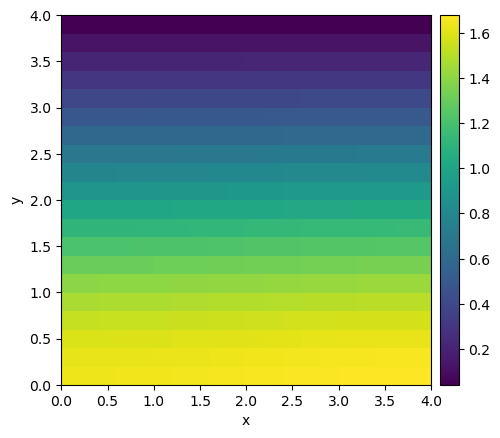

In [2]:
#test out K-S equation
from pde import PDE, ScalarField, UnitGrid

grid = pde.CartesianGrid([[0, 4], [0, 4]], [20, 20], periodic=[False, False])
#grid = UnitGrid([32, 32])  # generate grid
state = ScalarField.random_uniform(grid)  # generate initial condition

bc_x_left = {"derivative": 0}
#bc_x_right = {"value_expression": trial.control}
bc_x_right = {"derivative": 0}
bc_x = [bc_x_left, bc_x_right]
bc_y_bottom = {"derivative": 0}
#bc_x_right = {"value_expression": trial.control}
bc_y_top = {"value": 0}
bc_y = [bc_y_bottom, bc_y_top]

eq = PDE({"u": "-gradient_squared(u) / 2 - laplace(u + laplace(u))"}, bc=[bc_x,bc_y])  # define the pde
result = eq.solve(state, t_range=10, adaptive=True)
result.plot()  